<a href="https://colab.research.google.com/github/since1630/AI_11_-/blob/main/AI_11_%EC%8B%A0%EC%84%B1%EC%9C%A4_%EA%B2%8C%EC%9E%84%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['axes.unicode_minus'] = False
from matplotlib import rc
plt.rc('font', family='AppleGothic')

# 1. 데이터 로드

In [2]:
df = pd.read_csv('./vgames2.csv')

In [3]:
df.drop('Unnamed: 0', axis=1,inplace=True)

In [4]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


# 2. 데이터 확인

#### 2.1 데이터 타입

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


#### 2.2 데이터 결측치 확인

In [6]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [7]:
print(df.isnull().sum() / len(df) * 100 )

Name           0.000000
Platform       0.000000
Year           1.632727
Genre          0.301241
Publisher      0.349440
NA_Sales       0.000000
EU_Sales       0.000000
JP_Sales       0.000000
Other_Sales    0.000000
dtype: float64


In [8]:
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales'],
      dtype='object')

In [9]:
df['NA_Sales'].unique()

array(['0.04', '0.17', '0', '0.12', '0.02', '0.07', '480K', '0.14',
       '0.01', '0.57', '0.06', '0.08', '0.48', '0.03', '0.05', '1.93',
       '0.29', '0.19', '0.3', '0.26', '0.11', '0.18', '0.33', '0.51',
       '60K', '0.13', '0.52', '0.34', '0.25', '0.41', '0.22', '0.35',
       '0.1', '0.67', '0.59', '0.36', '0.21', '1.19', '5.91', '1.98',
       '0.09', '0K', '0.5', '0.94', '0.16', '0.63', '0.43', '0.2', '1.23',
       '0.44', '0.42', '0.97', '2.67', '0.28', '6.05', '0.47', '0.49',
       '0.62', '0.24', '0.72', '1.74', '0.46', '0.65', '0.32', '1.53',
       '0.23', '0.53', '0.37', '1.26', '0.39', '0.58', '1.94', '2.31',
       '1.03', '0.82', '0.4', '0.93', '0.56', '0.96', '1.64', '0.69',
       '1.25', '0.27', '0.92', '0.58M', '1.24', '0.25M', '0.86', '0.73',
       '0.55', '1.54', '1.02', '1.27', '0.54', '0.15', '1.09', '3.44',
       '2.29', '0.88', '5.55M', '1.37', '2.3', '0.99', '1.15', '0.98',
       '0.75', '0.74', '0.7', '0.14M', '0.45', '1.2', '1.41', '0.68',
       '

In [10]:
df['EU_Sales'].unique()

array(['0', '0.09', '0.01', '0.03', '0.33M', '0.05', '0.02', '0.16',
       '0.45', '0.04', '0.53', '0.23', '0.1', '0.34', '0.22', '0.2',
       '0.03M', '0.33', '0.08', '0.26', '0.07', '0.11', '0.17', '0.06',
       '0.14', '0.12', '0.24', '0.13', '0.21', '0.15', '0.3', '2.38',
       '0.55', '0K', '1.12', '0.43', '50K', '0.63', '0.35', '1.11',
       '0.41', '0.01M', '0.89', '3.15', '0.18', '0.54', '0.25', '0.29',
       '0.61', '0.27', '0.86', '0.87', '0.32', '0.44', '2.48', '0.48',
       '0.47', '0.66', '0.76', '0.27M', '0.15M', '1.94', '0.97', '0.72',
       '620K', '0.49', '5.36', '0.31', '0.62', '0.4', '0.57', '0.46',
       '1.97', '1.02', '1.75', '0.28', '2.46', '0.38', '0.5', '0.9',
       '0.19', '0.39', '0.67', '0.64', '0.37', '0.51', '2.83', '0.59',
       '0.75', '0.52', '1.34', '760K', '80K', '5.09', '1.09', '2.19',
       '2.17', '0.91', '2.26', '0.83', '0.74', '0.88', '0.77', '1.24',
       '0.92', '0.8', '0.36', '20K', '1.15', '0.58', '1.51', '0M', '40K',
       '1.1

In [11]:
df['JP_Sales'].unique()

array(['0', '0.02', '0.14', '0.11', '0.04', '0K', '0.03', '0.01', '0.08',
       '0.3', '0.25', '0.05', '0.16', '0.12', '0.07', '0.85', '0.37',
       '0.41', '0.51', '0.89', '1.17', '0.13', '0.17', '0.6', '0.06',
       '0.53', '1.25', '0.18', '0.15', '4.1', '0.22', '0.46', '0.34',
       '1.2', '0.31', '0.65', '0.21', '1.96', '0.09', '0.28', '0.64',
       '0.57', '0.36', '0.19', '0.26', '0.75', '0.44', '0.27', '0.5',
       '0.62', '0.87', '0.2', '0.23', '2.35', '0.69', '0.97', '0.01M',
       '0.49', '5.32', '0.4', '2.62', '1.08', '0.56', '0.1', '2.23',
       '1.07', '0.47', '0M', '0.29', '0.76', '0.72', '0.33', '0.91',
       '0.74', '0.24', '0.55', '0.48', '0.32', '30K', '0.7', '0.75M',
       '0.9', '0.86', '1.18', '0.45M', '0.63', '0.35', '1.87', '1.31',
       '0.38', '1.75', '0.06M', '1.06', '1.13', '4.22', '1.1', '0.88',
       '0.59', '0.83', '1.12', '1.33', '1.26', '1.35', '40K', '0.99',
       '1.29', '50K', '0.02M', '0.79', '0.45', '3.15M', '1.39', '0.39',
       '4.87'

In [12]:
df['Other_Sales'].unique()

array(['0', '0.01', '0.04', '0.06', '0.15', '0.23', '0.02', '0.21',
       '0.08', '0.05', '0.03', '0.1', '0M', '0.01M', '0.2', '0.9', '0.32',
       '0.07', '0.34', '0.22', '0.37', '0.14', '1.07', '10K', '0.25',
       '0K', '0.24', '0.16', '0.09', '0.58', '30K', '0.13', '0.18',
       '0.12', '0.27', '0.77', '0.39', '0.44', '0.26', '1.18', '0.11',
       '0.72', '0.28', '0.19', '1.09', '0.54', '0.06M', '1.75', '2.46',
       '0.31', '0.17', '0.33', '1.16', '0.7', '50K', '0.42', '0.29',
       '0.41', '0.61', '0.57', '1.14', '0.64', '0.43', '0.3', '0.35',
       '0.66', '0.79', '0.05M', '0.4', '2.02', '0.69', '0.73', '0.18M',
       '0.99', '40K', '80K', '0.36', '1.26', '0.52', '1.73', '0.03M',
       '0.47', '1.68', '0.48', '1.32', '0.59', '8.46', '2.85', '1.23',
       '0.75', '1.47', '0.49', '0.88', '2.96', '2.15', '4.14', '0.53',
       '0.04M', '0.38', '0.02M', '0.46', '0.65', '0.51', '1.04', '2.52',
       '0.78', '1.67', '0.2M', '0.68', '1.48', '0.87', '1.41', '20K',
       '0.

In [13]:
df['Genre'].unique()

array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter', nan], dtype=object)

In [14]:
print(df['Publisher'].isnull().sum() / len(df['Publisher'])*100)

0.3494396915290999


In [15]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [16]:
print(df['Year'].isnull().sum() / len(df['Year'])*100)

1.6327268345583803


#### 2.3 데이터 숫자 변환

In [17]:
df['NA_Sales'] = (df['NA_Sales'].replace(r'[KM]+$', '', regex=True).astype(float) * 
             df['NA_Sales'].str.extract(r'[\d\.]+([KM]+)', expand=False)
                       .fillna(10**6)
                       .replace(['K','M'],[10**3,10**6]).astype(int))

df['EU_Sales'] = (df['EU_Sales'].replace(r'[KM]+$', '', regex=True).astype(float) * 
             df['EU_Sales'].str.extract(r'[\d\.]+([KM]+)', expand=False)
                       .fillna(10**6)
                       .replace(['K','M'],[10**3,10**6]).astype(int))

df['JP_Sales'] = (df['JP_Sales'].replace(r'[KM]+$', '', regex=True).astype(float) * 
             df['JP_Sales'].str.extract(r'[\d\.]+([KM]+)', expand=False)
                       .fillna(10**6)
                       .replace(['K','M'],[10**3,10**6]).astype(int))

df['Other_Sales'] = (df['Other_Sales'].replace(r'[KM]+$', '', regex=True).astype(float) * 
             df['Other_Sales'].str.extract(r'[\d\.]+([KM]+)', expand=False)
                       .fillna(10**6)
                       .replace(['K','M'],[10**3,10**6]).astype(int))



In [18]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40000.0,0.0,0.0,0.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20000.0,0.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40000.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,150000.0,40000.0,0.0,10000.0
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,10000.0,0.0,0.0,0.0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,440000.0,190000.0,30000.0,130000.0
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,50000.0,50000.0,250000.0,30000.0


In [19]:
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

In [20]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40000.0,0.0,0.0,0.0,40000.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0,180000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20000.0,0.0,20000.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40000.0,0.0,0.0,0.0,40000.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0,250000.0
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,150000.0,40000.0,0.0,10000.0,200000.0
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,10000.0,0.0,0.0,0.0,10000.0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,440000.0,190000.0,30000.0,130000.0,790000.0
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,50000.0,50000.0,250000.0,30000.0,380000.0


In [21]:
df['Year'].dtype

dtype('float64')

연도는 float 형태가 아닌 int 형태여야 한다.

In [22]:
df['Year'].unique()

array([2.008e+03, 2.009e+03, 2.010e+03, 2.005e+03, 2.011e+03, 2.007e+03,
       2.001e+03, 2.003e+03, 2.006e+03, 2.014e+03, 2.015e+03, 2.002e+03,
       1.997e+03, 2.013e+03, 1.996e+03, 2.004e+03, 2.000e+03,       nan,
       1.984e+03, 1.998e+03, 2.016e+03, 1.985e+03, 1.999e+03, 9.000e+00,
       9.700e+01, 1.995e+03, 1.993e+03, 2.012e+03, 1.987e+03, 1.982e+03,
       1.100e+01, 1.994e+03, 1.990e+03, 1.500e+01, 1.992e+03, 1.991e+03,
       1.983e+03, 1.988e+03, 1.981e+03, 3.000e+00, 1.989e+03, 9.600e+01,
       6.000e+00, 8.000e+00, 1.986e+03, 1.000e+00, 5.000e+00, 4.000e+00,
       1.000e+01, 9.800e+01, 7.000e+00, 1.600e+01, 8.600e+01, 1.400e+01,
       9.500e+01, 2.017e+03, 1.980e+03, 2.020e+03, 2.000e+00, 1.300e+01,
       0.000e+00, 1.200e+01, 9.400e+01])

In [23]:
def year(num):
  if (num >= 0) & (num < 20):
    return 2000+num
  elif (num >=80) & (num <99):
    return 1900+num
  else:
    return num

In [24]:
df = df.dropna(axis=0)

In [25]:
df['Year'] = df['Year'].astype('int')

In [26]:
df['Year'] = df['Year'].apply(year)

In [27]:
df['Year'].unique()

array([2008, 2009, 2010, 2005, 2011, 2007, 2001, 2003, 2006, 2014, 2015,
       2002, 1997, 2013, 1996, 2004, 2000, 1984, 1998, 2016, 1985, 1999,
       1995, 1993, 2012, 1987, 1982, 1994, 1990, 1992, 1991, 1983, 1988,
       1981, 1989, 1986, 2017, 1980, 2020])

#### 2.4 결측치 처리

In [28]:
df_sale_20rank = df.sort_values(by='Total_Sales', ascending=False).head(20)

In [29]:
df_sale_20rank

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2908,Wii Sports,Wii,2006,Sports,Nintendo,41490000.0,29020000.0,3770000.0,8460000.0,82740000.0
4199,Super Mario Bros.,NES,1985,Platform,Nintendo,29080000.0,3580000.0,6810000.0,770000.0,40240000.0
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,15850000.0,12880000.0,3790000.0,3310000.0,35830000.0
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,15750000.0,11010000.0,3280000.0,2960000.0,33000000.0
7829,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11270000.0,8890000.0,10220000.0,1000000.0,31380000.0
1203,Tetris,GB,1989,Puzzle,Nintendo,23200000.0,2260000.0,4220000.0,580000.0,30260000.0
6937,New Super Mario Bros.,DS,2006,Platform,Nintendo,11380000.0,9230000.0,6500000.0,2900000.0,30010000.0
3014,Wii Play,Wii,2006,Misc,Nintendo,14030000.0,9200000.0,2930000.0,2850000.0,29010000.0
16531,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14590000.0,7060000.0,4700000.0,2260000.0,28610000.0
10488,Duck Hunt,NES,1984,Shooter,Nintendo,26930000.0,630000.0,280000.0,470000.0,28310000.0


In [30]:
df['Name'].value_counts()

Need for Speed: Most Wanted    12
LEGO Marvel Super Heroes        9
Ratatouille                     9
FIFA 14                         9
LEGO Jurassic World             8
                               ..
Pokemon Ranger                  1
Virtual Soccer                  1
Neighborhood Games              1
Nonomura Byoin no Hitobito      1
Rainbow Islands: Revolution     1
Name: Name, Length: 11295, dtype: int64

In [31]:
df['Name'].unique()

array(["Candace Kane's Candy Factory", 'The Munchables',
       'Otome wa Oanesama Boku ni Koi Shiteru Portable', ...,
       'White Album: Tsuzurareru Fuyu no Omoide', 'Minna no Chizu 2',
       'Rainbow Islands: Revolution'], dtype=object)

In [32]:
df_sale_20rank.iloc[0,-1]

82740000.0

#### 연도 결측치에 대해 알아보자

In [33]:
df.loc[df['Year'].isnull(),['Name','Total_Sales']].sort_values(by='Total_Sales',ascending=False)

,Name,Total_Sales


#### 연도 결측치는 총 판매량 비중에 미미한 영향만 주므로 제거하기로 결정

#### 장르 결측치에 대해 알아보자

In [34]:
df.loc[df['Genre'].isnull(),['Name','Total_Sales']].sort_values(by='Total_Sales',ascending=False)

,Name,Total_Sales


In [35]:
df[df['Name'] == 'Pokemon X/Pokemon Y']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales


In [36]:
df[df['Name'] == 'Wii Party']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales


#### 장르 결측치 결론 : 제품이름을 추적했으나 장르를 알수없기에 제거하기로 결정

In [37]:
a = df.loc[df['Year'].isnull(),'Total_Sales'] / df_sale_20rank.iloc[19,-1] * 100

In [38]:
a.sort_values(ascending=False).head(20)

Series([], Name: Total_Sales, dtype: float64)

#### Publisher의 결측치에 대해 알아보자

In [39]:
df.loc[df['Publisher'].isnull(),['Name','Total_Sales']].sort_values(by='Total_Sales',ascending=False)

,Name,Total_Sales


#### 출판사에 대한 총 판매량 또한 미미하므로 결측치는 제거하기로 결정

## 결측치 결론 : 판매량에 별로 영향을 미치지 않으며 전체 컬럼에 비해 결측치의 비중이 매우 작기 때문에 전부 제거하기로 결정

In [40]:
df['NA_Sales'] = df['NA_Sales'].astype('int') / 10**6
df['EU_Sales'] = df['EU_Sales'].astype('int')/ 10**6
df['JP_Sales'] = df['JP_Sales'].astype('int')/ 10**6
df['Other_Sales'] = df['Other_Sales'].astype('int')/ 10**6
df['Total_Sales'] = df['Total_Sales'].astype('int')/ 10**6

In [41]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


# 1. 지역에 따른 선호 게임장르

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


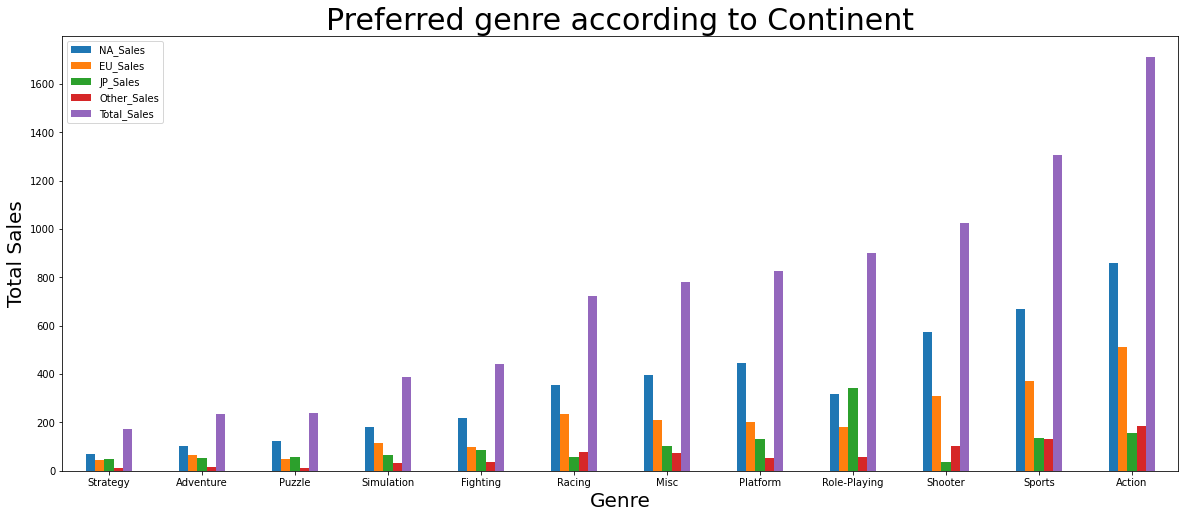

In [42]:
f,ax = plt.subplots(1,1,figsize=(20,8))
plt.xlabel('Genre', fontsize=20)
plt.ylabel('Total Sales', fontsize=20)
plt.title('Preferred genre according to Continent', fontsize=30)

df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total_Sales','Genre']].groupby(['Genre']).sum().sort_values(by=['Total_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales'],ascending=True).plot.bar(ax=ax)
plt.xticks(rotation=0)
plt.savefig('Preferred genre by Continet.png')

In [43]:
df_region = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Genre']].groupby(['Genre']).sum()

In [44]:
df_region_reset = df_region.reset_index()

In [45]:
df_region_reset

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,858.749997,513.639997,156.600000,183.989998
1,Adventure,101.790000,63.660000,51.870000,16.700000
2,Fighting,220.349998,99.900000,87.140000,36.150000
3,Misc,394.729999,208.150000,104.180000,72.639999
4,Platform,445.379999,200.629999,130.529999,51.450000
5,Puzzle,121.579999,50.470000,56.240000,12.440000
6,Racing,354.699997,235.019999,56.320000,76.510000
7,Role-Playing,318.759999,183.089998,342.929999,56.730000
8,Shooter,574.479997,310.229996,38.180000,101.860000
9,Simulation,181.429998,112.990000,63.540000,31.320000


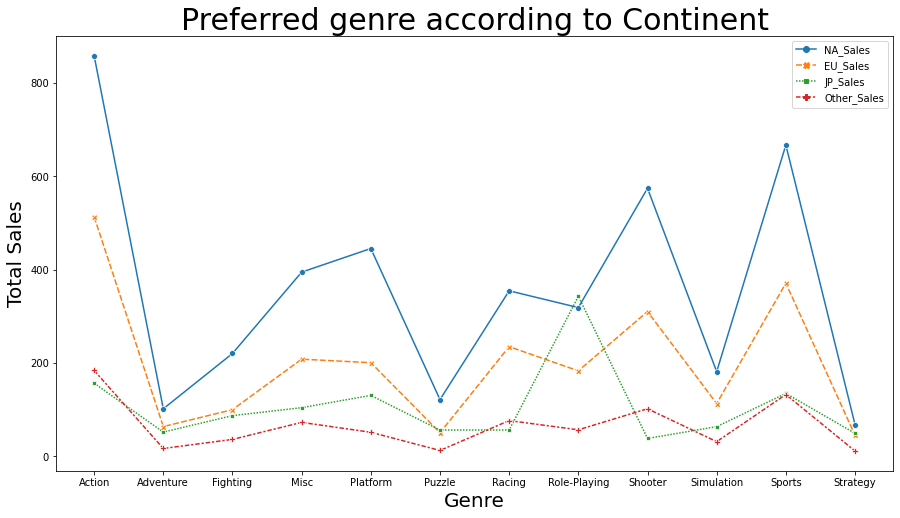

In [46]:
f,ax = plt.subplots(1,1,figsize=(15,8))
plt.xlabel('Genre', fontsize=20)
plt.ylabel('Total Sales', fontsize=20)
plt.title('Preferred genre according to Continent', fontsize=30)
sns.lineplot(data=df_region_reset.set_index('Genre'), markers=True)

## 지역별 게임장르 순위 결론 : (1) 북미 / 유럽 / 일본 순으로 판매량이 높고 장르 순위는 1.Action 2.Sports 3.Shooter 순으로 인기가 많다. (2) Role-Playing 장르만 4개 지역중 일본에서 인기가 가장 높다.

# 2.연도별 게임 트렌드

In [47]:
df_trend = df.groupby(['Genre','Year'])['Total_Sales'].sum().reset_index()

In [48]:
df_yearmax_trend = df_trend.groupby('Year' , as_index = False)['Genre','Total_Sales'].max()

In [49]:
df_yearmax_trend

,Year,Genre,Total_Sales
0,1980,Shooter,7.07
1,1981,Sports,14.79
2,1982,Sports,10.04
3,1983,Sports,6.93
4,1984,Sports,31.10
5,1985,Sports,43.17
6,1986,Sports,13.74
7,1987,Sports,5.42
8,1988,Sports,27.73
9,1989,Sports,37.75


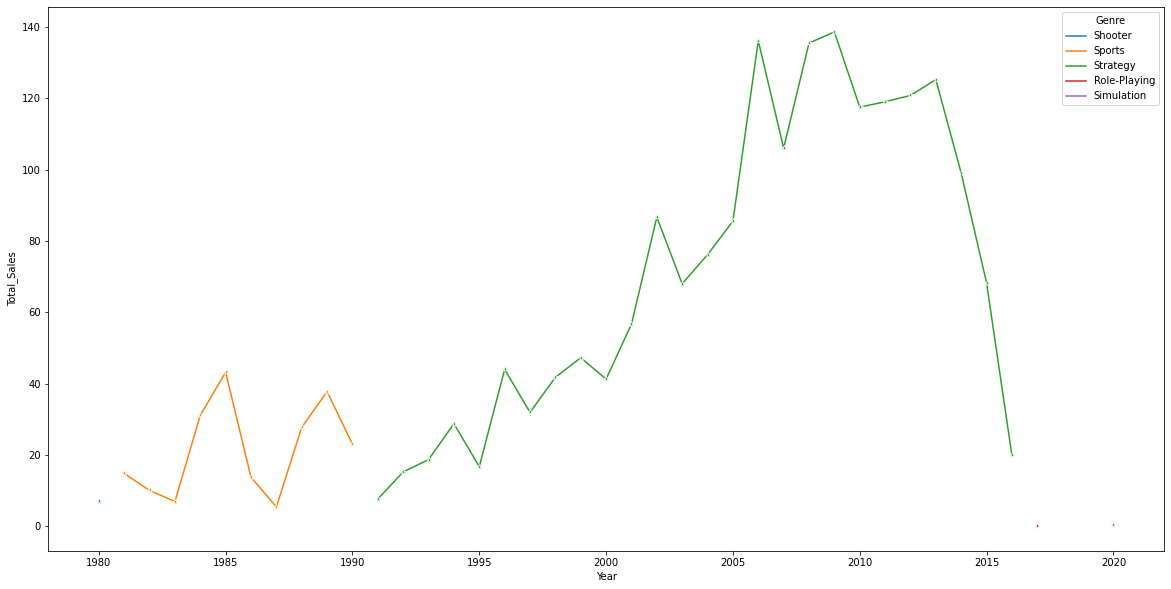

In [50]:
f , ax = plt.subplots(1,1,figsize=(20,10))
sns.lineplot(x = 'Year' , y = 'Total_Sales', hue = 'Genre' ,marker = '*',data=df_yearmax_trend , ax=ax)

## Lineplot은 데이터 값이 제대로 나오지 않는다.( 장르 데이터의 편차가 심하기 때문) 따라서 다른 그래프를 선택해야겠다.




In [51]:
sns.set_style('whitegrid')

In [52]:
df_trend = df_trend.sort_values(by='Total_Sales', ascending=False)

In [53]:
condition = df_trend['Total_Sales'] == df_trend.groupby(['Year'])['Total_Sales'].transform(max)

In [54]:
df_trend = df_trend[condition]

In [55]:
df_trend = df_trend.sort_values(by='Year')

In [56]:
df_trend['Genre'].values

array(['Shooter', 'Action', 'Puzzle', 'Platform', 'Shooter', 'Platform',
       'Action', 'Fighting', 'Platform', 'Puzzle', 'Platform', 'Platform',
       'Fighting', 'Platform', 'Platform', 'Platform', 'Role-Playing',
       'Racing', 'Sports', 'Role-Playing', 'Sports', 'Action', 'Action',
       'Action', 'Action', 'Action', 'Sports', 'Action', 'Action',
       'Sports', 'Action', 'Action', 'Action', 'Action', 'Action',
       'Action', 'Action', 'Role-Playing', 'Simulation'], dtype=object)

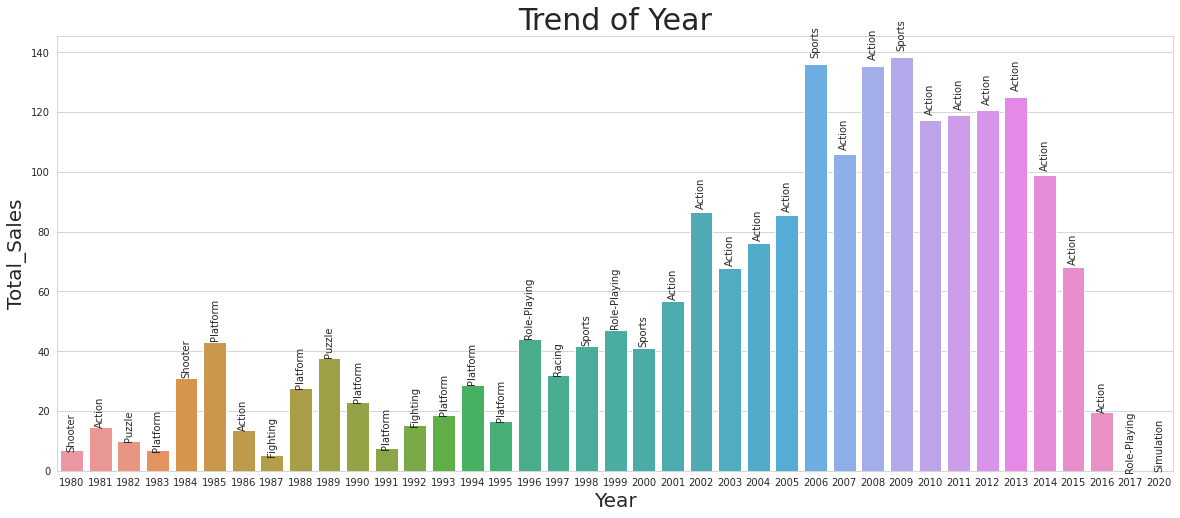

In [57]:
f,ax = plt.subplots(1,1,figsize=(20,8))
sns.barplot(x = 'Year',y = 'Total_Sales',data=df_trend, ax=ax)
plt.title('Trend of Year' , fontsize=30)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Total_Sales', fontsize=20)

index=0
for p in ax.patches:
  _x = p.get_x() + p.get_width() / 2
  _y = p.get_y() + p.get_height() + (p.get_height()*0.02)
  value = df_trend['Genre'].values
  ax.text(_x,_y, value[index], rotation = 90 , ha='center')
  index += 1

#### 연도별 게임 트렌드 결론 : 게임의 수요가 많이 줄었으나 그래도 Action 장르는 꾸준한 인기를 누리고 있다. (2001 - 2016년 1순위 )

# 3. 출고량이 높은 게임분석 및 시각화

In [58]:
df.sort_values(by='Total_Sales',ascending=False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2908,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4199,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7829,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
1203,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6937,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
3014,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
16531,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
10488,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [59]:
# df['NA_Sales'] = df['NA_Sales'].astype('int')
# df['EU_Sales'] = df['EU_Sales'].astype('int')
# df['JP_Sales'] = df['JP_Sales'].astype('int')
# df['Other_Sales'] = df['Other_Sales'].astype('int')
# df['Total_Sales'] = df['Total_Sales'].astype('int')

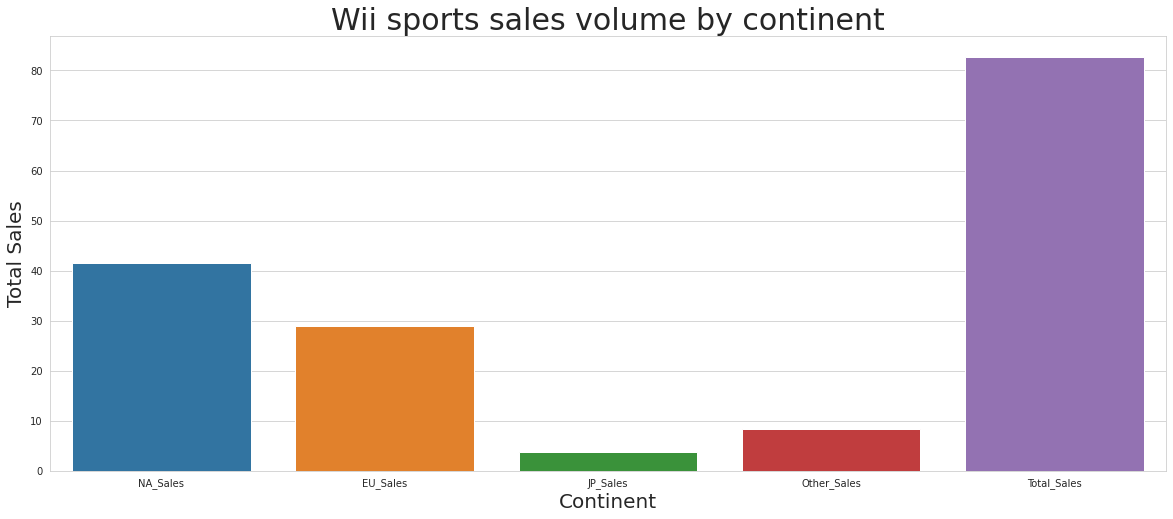

In [60]:
df_Wii = df[df['Name'] == 'Wii Sports']
df_Wii.drop('Year',axis=1,inplace=True)
f,ax = plt.subplots(1,1,figsize=(20,8))
plt.title('Wii sports sales volume by continent', fontsize=30)
plt.xlabel('Continent', fontsize=20)
plt.ylabel('Total Sales', fontsize=20)
sns.barplot(data=df_Wii,ax=ax)

In [61]:
df_publisher_rank10 = df.groupby('Publisher' , as_index = False)['Total_Sales'].sum().sort_values(by='Total_Sales',ascending=False).head(10)

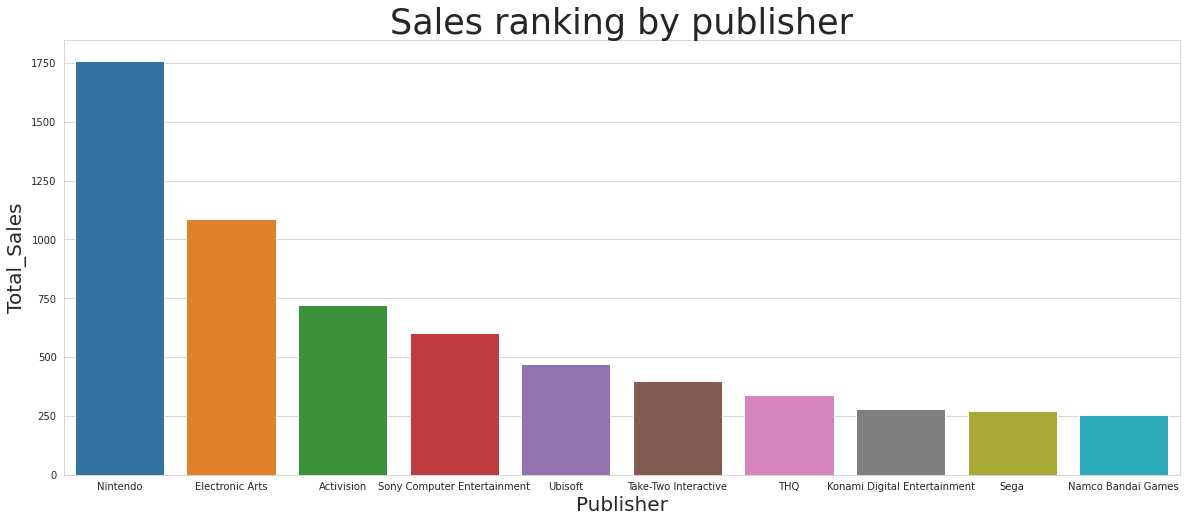

In [62]:
f,ax = plt.subplots(1,1,figsize=(20,8))
plt.title('Sales ranking by publisher', fontsize=35)
plt.xlabel('Top 10 Publishers', fontsize=20)
plt.ylabel('Total Sales', fontsize=20)
plt.subplots_adjust(wspace=0.2,hspace=0.5)
sns.barplot(x='Publisher',y='Total_Sales',data=df_publisher_rank10, ax=ax)

## 출고량이 높은 게임분석 결론 : Wii Sports 란 게임의 판매량이 가장높으며 북미지역에서 가장 인기가 있는 게임이다. 판매 1순위 출판사를 통해 배급했으며 배급방식은 단일플랫폼(Wii)를 선택했다.

In [63]:
df[df['Name'] == 'Wii Sports']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2908,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


# Q. 다음 분기에 어떤 게임을 출시해야할까?

1.가장 인기있는 게임장르는? -> "Action"

2."Action" 장르중 어느 배급사를 선택할것인가? 'Take-Two Interactive' 가 Action장르 판매율이 가장 높으므로 이곳을 우선적으로 선택.

3."Action" 장르중 어느 플랫폼이 가장 인기가 있는가? 'PS3,PS2,X-box360'인 콘솔류 게임.

4."Action" 장르중 어느 게임이 1위 인가? "GTA시리즈"

5."GTA"는 어디 플랫폼에서 잘 팔릴까? "콘솔게임(Play-Station,X-box360)"

5.장르 선택후 다중플랫폼 vs 단일 플랫폼 : 2Sample Chi-Square을 통해 판매량과 플랫폼은 연관성이 없는것으로 확인했다.




In [64]:
# Google Colab matplotlib 한글 폰트 오류 문제 해결

# 1. 나눔 폰트 다운
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# 2. 런타임 다시 시작

# 3. matplotlib의 폰트를 Nanum 폰트로 지정
# import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [65]:
df_genre_rank = df.groupby('Genre',as_index=False)['Total_Sales'].sum().sort_values(by='Total_Sales',ascending=False)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


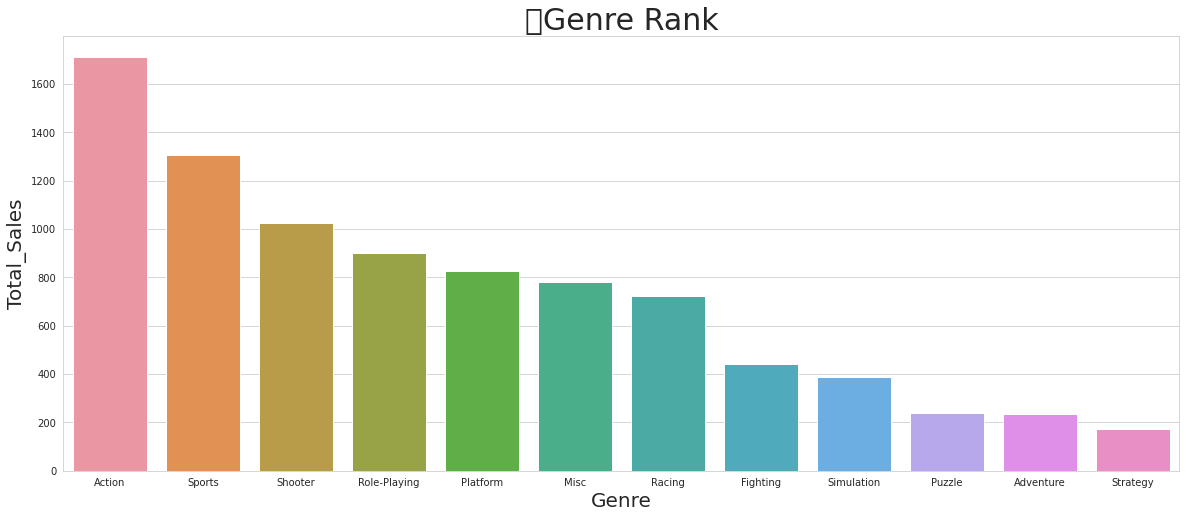

In [66]:
f,ax = plt.subplots(1,1,figsize=(20,8))
plt.title('Genre Rank', fontsize=30)
plt.xlabel('Genre', fontsize=20)
plt.ylabel('Total Sales', fontsize=20)
sns.barplot(x ='Genre',y='Total_Sales',data= df_genre_rank , ax=ax , ci = False)

#### 1. 가장 인기있는 장르 : Action

In [67]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [68]:
df_Publisher_toprank10 = df.groupby('Publisher', as_index=False)['Total_Sales'].sum().sort_values(by='Total_Sales',ascending=False).head(10)

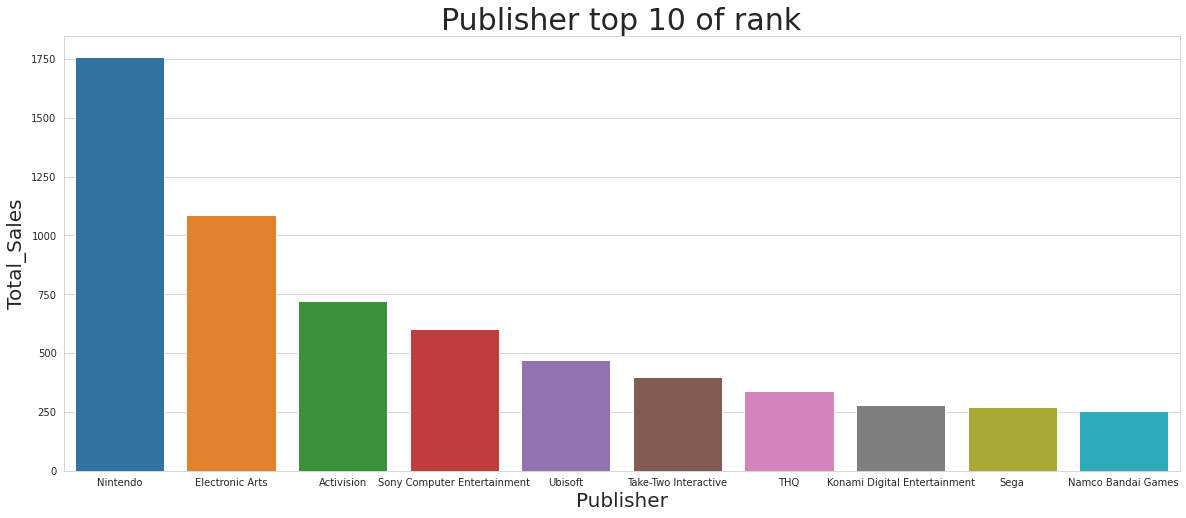

In [69]:
f,ax = plt.subplots(1,1,figsize=(20,8))
plt.title('Publisher top 10 of rank', fontsize=30)
plt.xlabel('Publisher', fontsize=20)
plt.ylabel('Total Sales', fontsize=20)
sns.barplot(x = 'Publisher',y='Total_Sales',data= df_Publisher_toprank10 , ax=ax , ci = False)

 

#### 장르불문 배급사 1위는 Nintendo 이다. 하지만 Action장르를 선택했기 때문에 Action장르를 가장 많이 배급한 배급사를 찾아보도록 하자.

In [70]:
df_action_publisher = df[df['Genre'] == 'Action'].groupby('Publisher',as_index = False)['Total_Sales'].sum().sort_values(by='Total_Sales',ascending=False).head(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


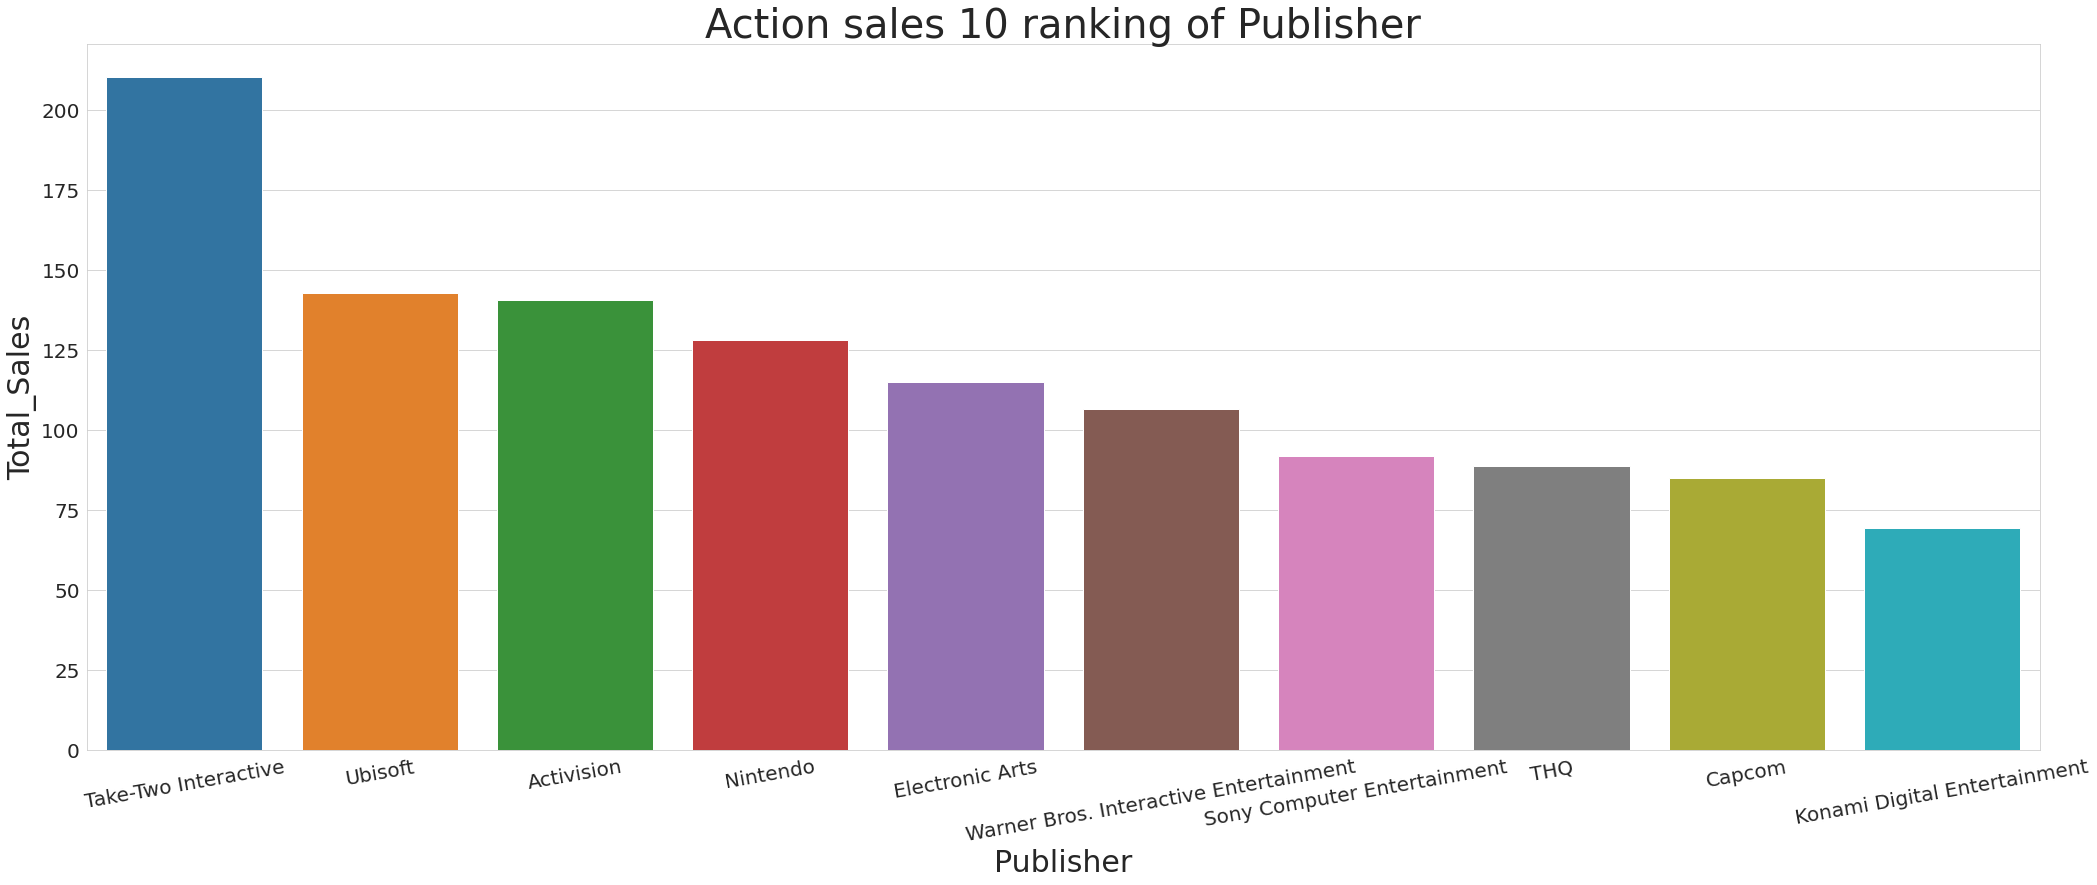

In [71]:
f,ax = plt.subplots(1,1,figsize=(35,13))
plt.title('Action sales 10 ranking of Publisher', fontsize=40)
plt.xlabel('Publisher', fontsize=30)
plt.ylabel('Total Sales', fontsize=30)
sns.barplot(x = 'Publisher',y='Total_Sales',data= df_action_publisher , ax=ax , ci = False)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20,rotation=10)

#### 'Action'장르 중에선 Take-Two Interactive 배급사의 판매량이 제일 높다.

In [72]:
df_action_platform = df[df['Genre'] == 'Action'].groupby('Platform',as_index = False)['Total_Sales'].sum().sort_values(by='Total_Sales',ascending=False).head(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

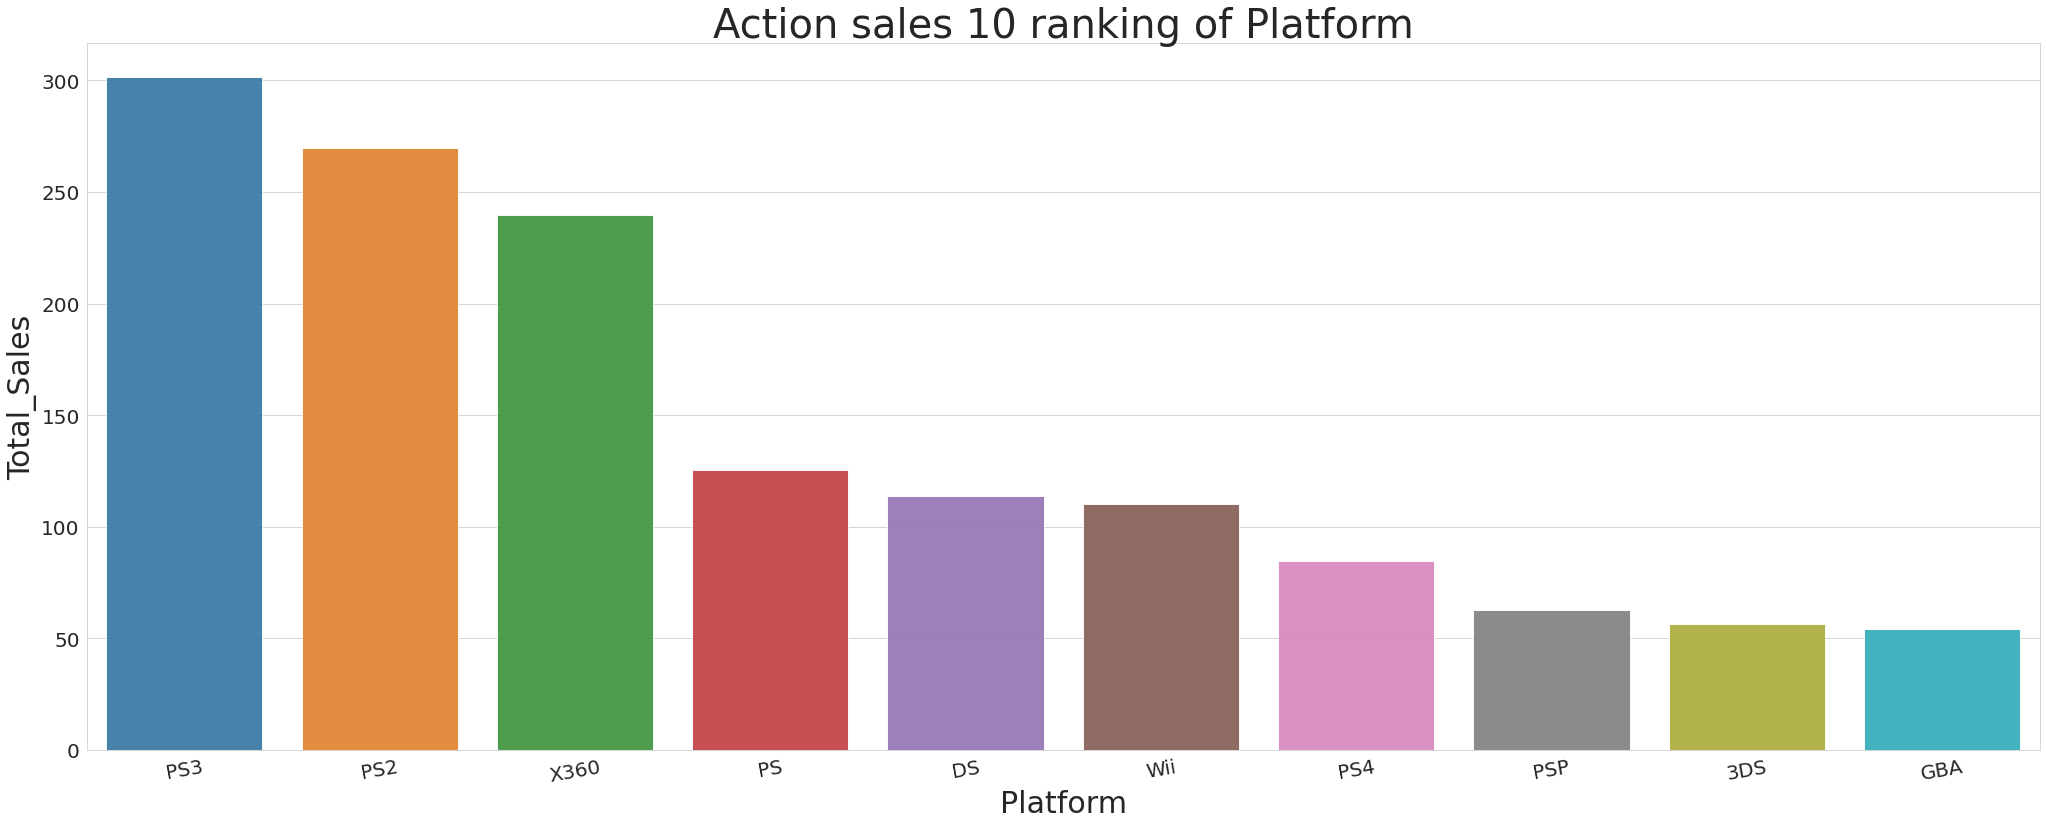

In [73]:
f,ax = plt.subplots(1,1,figsize=(35,13))
plt.title('Action sales 10 ranking of Platform', fontsize=40)
plt.xlabel('Platform', fontsize=30)
plt.ylabel('Total Sales', fontsize=30)
sns.barplot(x = 'Platform',y='Total_Sales',data= df_action_platform , ax=ax , ci = False, alpha=.9)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20,rotation=10)

#### 'Action'장르의 플랫폼 비중은 Play Station , X-box360 이 압도적으로 높다.

### 4. 'Action'장르중 어느 게임이 1위 인가?

In [74]:
df[df['Genre'] == 'Action'].sort_values(by='Total_Sales',ascending=False).head(20)  # 액션장르 상위20개는 어떤 게임들이 있을까?

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
3483,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.139999,21.39
14669,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.570000,20.81
10913,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.380000,16.38
5340,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8.41,5.49,0.47,1.780000,16.15
9786,Grand Theft Auto III,PS2,2001,Action,Take-Two Interactive,6.99,4.51,0.30,1.300000,13.10
2008,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.020000,11.99
4806,Pokemon HeartGold/Pokemon SoulSilver,DS,2009,Action,Nintendo,4.40,2.77,3.96,0.770000,11.90
13926,Grand Theft Auto IV,X360,2008,Action,Take-Two Interactive,6.76,3.10,0.14,1.030000,11.03
16475,Grand Theft Auto IV,PS3,2008,Action,Take-Two Interactive,4.76,3.76,0.44,1.620000,10.58
9035,FIFA Soccer 13,PS3,2012,Action,Electronic Arts,1.06,5.05,0.13,2.009999,8.25


#### 상위권 대부분이 GTA 시리즈이다. Action장르를 출시하기 위해선 GTA와 경쟁을 해야할수 있으므로 GTA에 대해 좀 더 분석해보자.

In [75]:
gta_condition = ((df['Genre'] == 'Action') & df['Name'].str.contains('Grand'))

In [76]:
df_gta = df[gta_condition]

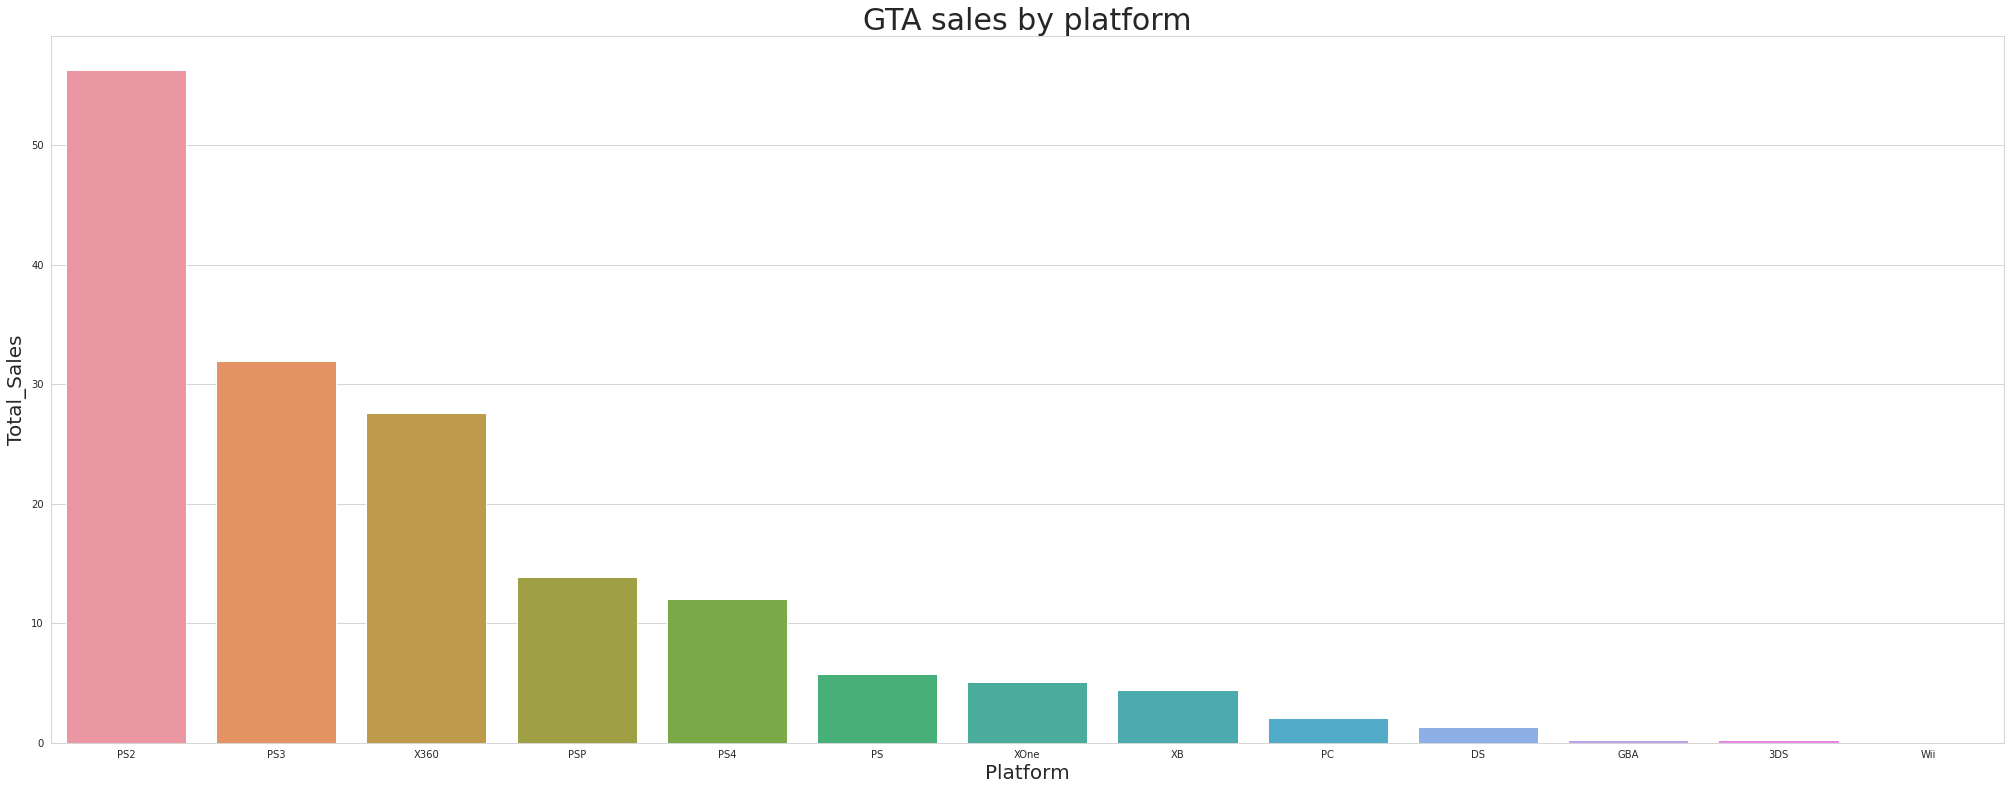

In [77]:
df_gta_platform = df_gta.groupby('Platform', as_index = False)['Total_Sales'].sum().sort_values(by='Total_Sales',ascending=False)
f,ax = plt.subplots(1,1,figsize=(35,13))
plt.title('GTA sales by platform', fontsize=30)
plt.xlabel('Platform', fontsize=20)
plt.ylabel('Total Sales', fontsize=20)
sns.barplot(x = 'Platform',y='Total_Sales',data= df_gta_platform , ax=ax , ci = False)

# df_plat_total = df.groupby('Platform', as_index = False)['Total_Sales'].sum().sort_values(by='Total_Sales', ascending=False)

# ax[1].set_title('Platform sales ranking', fontsize=30)
# ax[1].set_xlabel('Platform', fontsize=20)
# ax[1].set_ylabel('Total Sales', fontsize=20)
# sns.barplot(x = 'Platform',y='Total_Sales',data= df_plat_total , ax=ax[1] , ci = False)

 

In [78]:
df_gta_platform

,Platform,Total_Sales
5,PS2,56.29
6,PS3,31.97
10,X360,27.55
8,PSP,13.90
7,PS4,12.01
4,PS,5.74
12,XOne,5.08
11,XB,4.45
3,PC,2.10
1,DS,1.35


#### GTA는 콘솔게임에서 압도적인 판매량을 보인다. 

#### 어느 플랫폼이 가장 인기가 있나? PS2 , X360 , PS3 , Wii , DS , PS 순

In [79]:
# df_plat_total = df.groupby('Platform', as_index = False)['Total_Sales'].sum().sort_values(by='Total_Sales', ascending=False)

In [80]:
# f,ax = plt.subplots(1,1,figsize=(20,8))
# plt.title('Platform sales ranking', fontsize=30)
# plt.xlabel('Platform', fontsize=20)
# plt.ylabel('Total Sales', fontsize=20)
# sns.barplot(x = 'Platform',y='Total_Sales',data= df_plat_total , ax=ax , ci = False)

 

## GTA를 제외하고 살펴보도록 하자.

In [81]:
df_gta_exclude = df[~gta_condition]
df_gta_exclude

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01,0.20
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


In [82]:
df_gta_exclude.sort_values(by='Total_Sales' , ascending=False).head(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2908,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.020000,3.770000,8.460000,82.74
4199,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.580000,6.810000,0.770000,40.24
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.880000,3.790000,3.310000,35.83
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.010000,3.280000,2.960000,33.00
7829,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.890000,10.220000,1.000000,31.38
1203,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.260000,4.220000,0.580000,30.26
6937,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.230000,6.500000,2.900000,30.01
3014,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.200000,2.930000,2.850000,29.01
16531,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.060000,4.700000,2.260000,28.61
10488,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.630000,0.280000,0.470000,28.31


In [83]:
df_gta_exclude_total = df_gta_exclude.groupby('Genre' , as_index=False)['Total_Sales'].sum().sort_values(by='Total_Sales' , ascending=False)

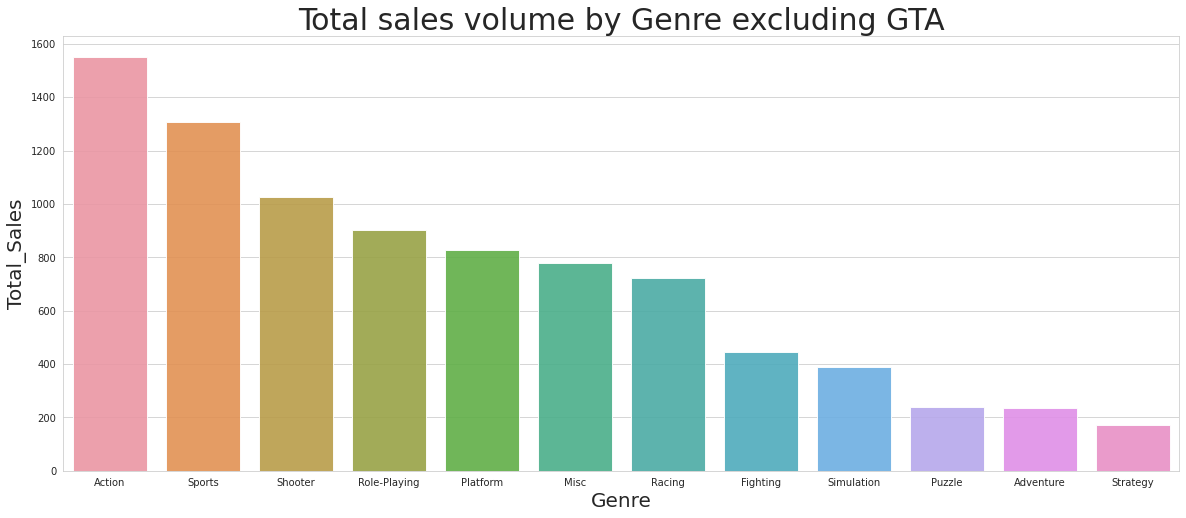

In [84]:
f,ax = plt.subplots(1,1,figsize=(20,8))
plt.title('Total sales volume by Genre excluding GTA', fontsize=30)
plt.xlabel('Genre', fontsize=20)
plt.ylabel('Total Sales', fontsize=20)
sns.barplot(x = 'Genre',y='Total_Sales',data= df_gta_exclude_total , ax=ax , ci = False , alpha=.9)

In [85]:
df_gta_exclude_plat_total = df_gta_exclude.groupby('Platform' , as_index=False)['Total_Sales'].sum().sort_values(by='Total_Sales' , ascending=False)
df_gta_exclude_plat_total

,Platform,Total_Sales
16,PS2,1166.15
28,X360,941.04
17,PS3,914.77
26,Wii,900.14
4,DS,815.84
15,PS,719.42
6,GBA,304.53
19,PSP,276.94
18,PS4,263.77
5,GB,254.43


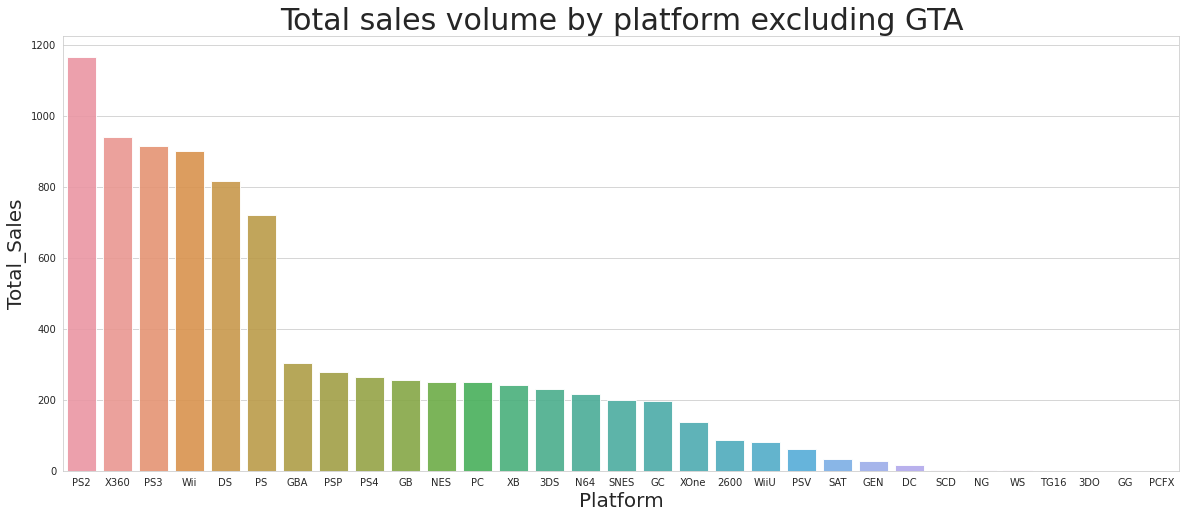

In [86]:
f,ax = plt.subplots(1,1,figsize=(20,8))
plt.title('Total sales volume by platform excluding GTA', fontsize=30)
plt.xlabel('Platform', fontsize=20)
plt.ylabel('Total Sales', fontsize=20)
sns.barplot(x = 'Platform', y='Total_Sales',data=df_gta_exclude_plat_total , ax=ax , ci = False , alpha=.9)

# GTA 유무에 따른 플랫폼별 판매량 변동 현황 결과표

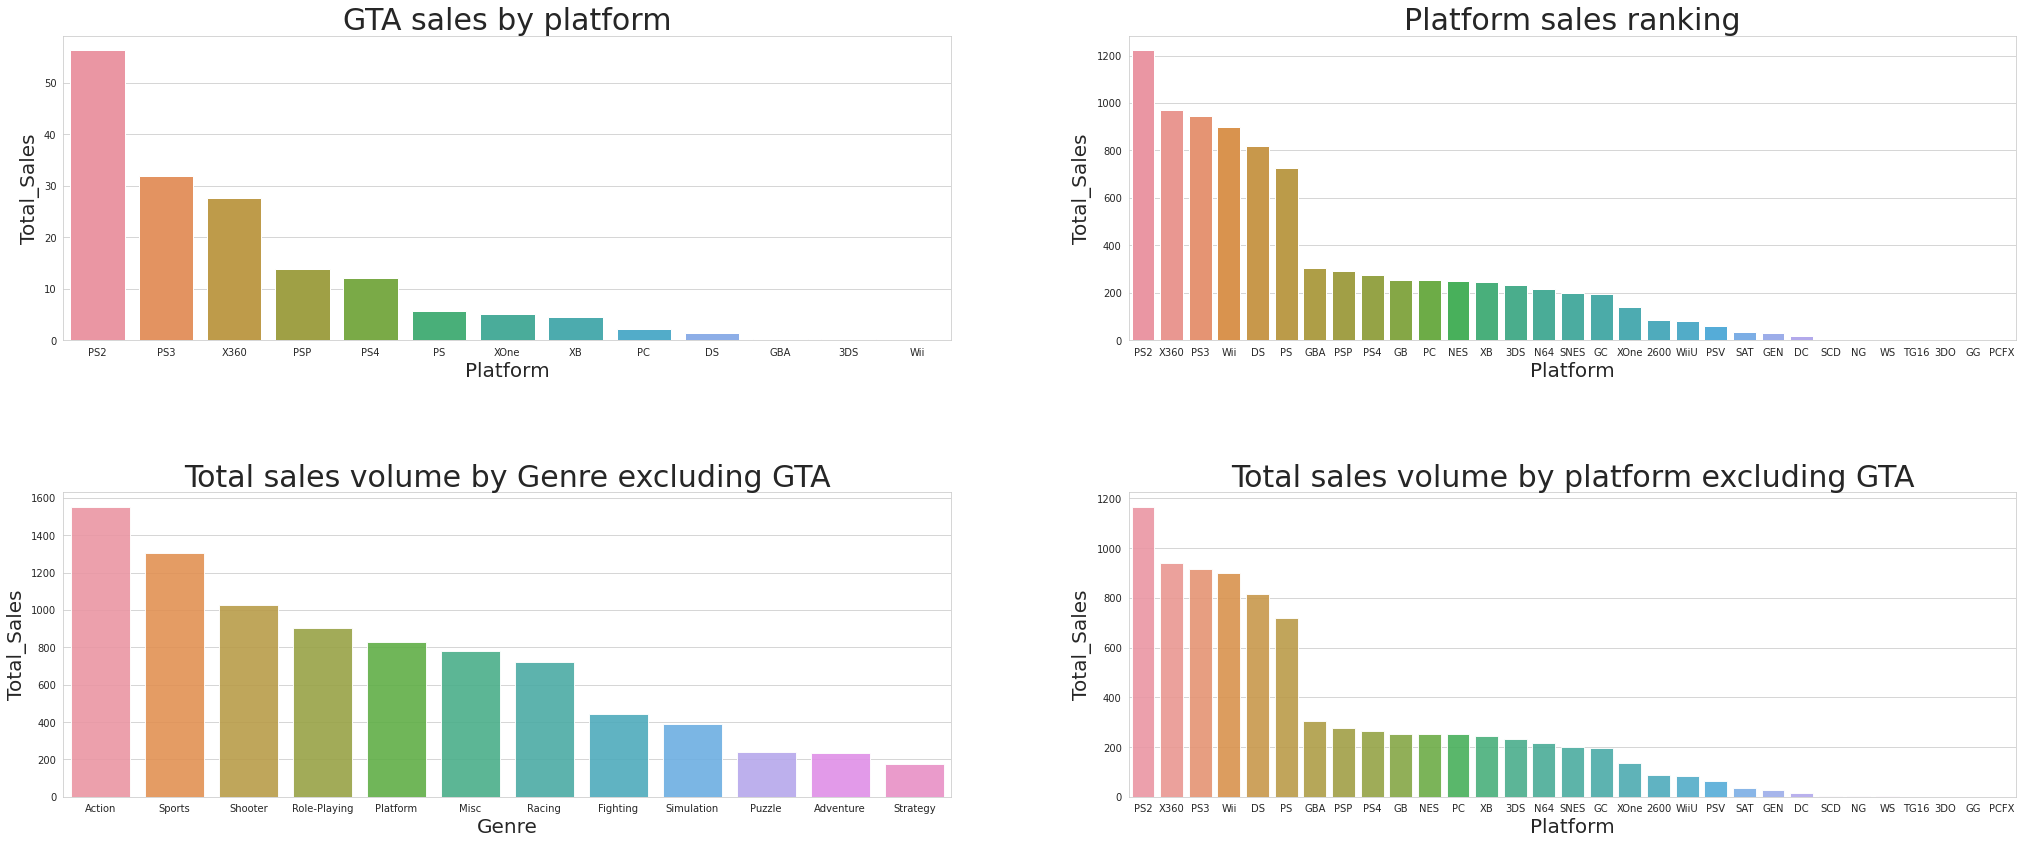

In [87]:
df_gta_platform = df_gta.groupby('Platform', as_index = False)['Total_Sales'].sum().sort_values(by='Total_Sales',ascending=False)
f,ax = plt.subplots(2,2,figsize=(35,14))
ax[0,0].set_title('GTA sales by platform', fontsize=30)
ax[0,0].set_xlabel('Platform', fontsize=20)
ax[0,0].set_ylabel('Total Sales', fontsize=20)
sns.barplot(x = 'Platform',y='Total_Sales',data= df_gta_platform , ax=ax[0,0] , ci = False)

df_plat_total = df.groupby('Platform', as_index = False)['Total_Sales'].sum().sort_values(by='Total_Sales', ascending=False)

ax[0,1].set_title('Platform sales ranking', fontsize=30)
ax[0,1].set_xlabel('Platform', fontsize=20)
ax[0,1].set_ylabel('Total Sales', fontsize=20)
sns.barplot(x = 'Platform',y='Total_Sales',data= df_plat_total , ax=ax[0,1] , ci = False)


ax[1,0].set_title('Total sales volume by Genre excluding GTA', fontsize=30)
ax[1,0].set_xlabel('Genre', fontsize=20)
ax[1,0].set_ylabel('Total Sales', fontsize=20)
sns.barplot(x = 'Genre',y='Total_Sales',data= df_gta_exclude_total , ax=ax[1,0] , ci = False , alpha=.9)


ax[1,1].set_title('Total sales volume by platform excluding GTA', fontsize=30)
ax[1,1].set_xlabel('Platform', fontsize=20)
ax[1,1].set_ylabel('Total Sales', fontsize=20)
sns.barplot(x = 'Platform', y='Total_Sales',data=df_gta_exclude_plat_total , ax=ax[1,1] , ci = False , alpha=.9)

plt.subplots_adjust(wspace=0.2,hspace=0.5)

# 6.장르 "Action"선택후 다중플랫폼 vs 단일 플랫폼

In [88]:
df_multiplat = df[df['Genre'] == 'Action'].groupby(['Platform','Year','Name'],as_index=False)['Total_Sales'].sum().sort_values(by='Total_Sales' , ascending=False)

In [89]:
df_multiplat_2chi = df_multiplat.groupby(['Name','Total_Sales'], as_index = False)['Platform'].count().sort_values(by='Platform',ascending=False)

df_multiplat_2chi_crosstab = pd.crosstab(df_multiplat_2chi['Platform'].astype('category'),df_multiplat_2chi['Total_Sales'].astype('category'))

In [90]:
df_multiplat_2chi_crosstab = df_multiplat_2chi_crosstab.reset_index(drop=True)
# df_multiplat_2chi_crosstab.drop(0, axis=0)
# df_multiplat_2chi_crosstab.columns = [1,2,3]


In [91]:
df_multiplat_2chi_crosstabT = df_multiplat_2chi_crosstab.T

In [92]:
df_multiplat_2chi_crosstabT.columns = ['1','2','3']

### 단일플랫폼 vs 다중플랫폼 고려한다는 가정하에 
### 판매량과 플랫폼 숫자가 어느정도 연관이 있는지 2 Chi-Square 방법을 이용해 알아보자.

In [93]:
from scipy.stats import chi2_contingency

chi2_contingency(df_multiplat_2chi_crosstabT.drop('3',axis=1))[:3]

(88.92218197725023, 1.0, 318)

#### P-value값이 1이 나왔으므로 판매량과 플랫폼은 연관성이 없다고 볼 수있다.

# Q. 다음 분기에 어떤 게임을 출시해야할까?

1.가장 인기있는 게임장르는? -> "Action"

2."Action" 장르중 어느 배급사를 선택할것인가? 'Take-Two Interactive' 가 Action장르 판매율이 가장 높으므로 이곳을 우선적으로 선택.

3."Action" 장르중 어느 플랫폼이 가장 인기가 있는가? 'PS3,PS2,X-box360'인 콘솔류 게임.

4."Action" 장르중 어느 게임이 1위 인가? "GTA시리즈"

5."GTA"는 어디 플랫폼에서 잘 팔릴까? "콘솔게임(Play-Station,X-box360)"

6 .장르 선택후 다중플랫폼 vs 단일 플랫폼 : 2Sample Chi-Square을 통해 판매량과 플랫폼은 연관성이 없는것으로 확인했다.




# GTA 를 심층분석한 이유


---

\
GTA시리즈가 콘솔 전체 판매량에 , 장르전체에 얼마나 영향을 미치는지 알아볼 필요가 있다고 생각했다.

  만약 GTA가 판매량의 대부분을 점유한다면 "Action" 게임 출시에 대해 다시 고려해야한다.

  왜냐하면 GTA출시 때에만 지갑을 여는 고객들이 대다수일 가능성이 높기 때문이다.

  조사한결과 GTA를 제외하고도 콘솔시장의 수요는 크고 Action 장르가 꾸준히 그리고 가장 인기있는 장르기에 "개발을 고려할 수 있다" 라는 결론을 내렸다.


# 결론 : 10년째 꾸준히 사랑받는 게임장르는 "Action" 장르다. 

  ## "Action" 장르를 출시할거라는 가정 ->

  Action 장르중 1위 게임은 GTA시리즈이다. GTA는 PC보단 콘솔에서 압도적 판매량을 보인다.

  플랫폼수가 판매량에 영향을 미치는지 알아보기 위해 카이제곱검정을 시행했고 서로 연관이 없음을 파악했다.







  


*   장르 : Action
*   배급사 : Action장르 판매율이 가장높은 Take-Two Interactive
*   플랫폼 : 콘솔(Play-Station , Xbox)
*   지역 : 북미1순위